In [4]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

from pylab import rcParams


# to move files from one directory to another
import shutil

In [5]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_plot_core as rcp

start_time = time.time()

In [6]:
data_dir = "/Users/hn/Documents/01_research_data/remote_sensing/LandSat_NASA/"

In [7]:
EVI_8day = pd.read_csv(data_dir + "NASA_LandSt_8dayEVI.csv", low_memory = False)
EVI_direct = pd.read_csv(data_dir + "NASA_LandSat_Tier1.csv", low_memory = False)

In [8]:
EVI_direct_IDs = list(EVI_direct.ID.unique())
EVI_direct_IDs

['108447_WSDA_SF_2017', '99423_WSDA_SF_2017', '107433_WSDA_SF_2017']

In [9]:
EVI_direct.head(2)

,ID,county,DataSrc,CropTyp,doy,EVI,Irrigtn,RtCrpTy,LstSrvD,Notes,system_start_time
0,108447_WSDA_SF_2017,Grant,wsda,"corn, field",217.0,0.229441,rill,Alfalfa Hay,2017/07/11,NaN,1.470423e+12
1,108447_WSDA_SF_2017,Grant,wsda,"corn, field",226.0,0.206901,rill,Alfalfa Hay,2017/07/11,NaN,1.471200e+12


In [10]:
EVI_8day.head(2)

,ID,county,DataSrc,CropTyp,doy,EVI,Irrigtn,RtCrpTy,LstSrvD,Notes,system_start_time
0,108447_WSDA_SF_2017,Grant,wsda,"corn, field",216.0,0.287852,rill,Alfalfa Hay,2017/07/11,NaN,1.470269e+12
1,108447_WSDA_SF_2017,Grant,wsda,"corn, field",224.0,0.257201,rill,Alfalfa Hay,2017/07/11,NaN,1.470960e+12


# Drop NA rows

In [11]:
EVI_direct = EVI_direct[EVI_direct['EVI'].notna()]
EVI_8day = EVI_8day[EVI_8day['EVI'].notna()]

# Take Care of system_start_time

In [12]:
EVI_8day = rc.add_human_start_time(EVI_8day)
EVI_direct = rc.add_human_start_time(EVI_direct)

In [13]:
EVI_8day.head(10)

,ID,county,DataSrc,CropTyp,doy,EVI,Irrigtn,RtCrpTy,LstSrvD,Notes,system_start_time,human_system_start_time
0,108447_WSDA_SF_2017,Grant,wsda,"corn, field",216.0,0.287852,rill,Alfalfa Hay,2017/07/11,NaN,1.470269e+09,2016-08-03
1,108447_WSDA_SF_2017,Grant,wsda,"corn, field",224.0,0.257201,rill,Alfalfa Hay,2017/07/11,NaN,1.470960e+09,2016-08-11
2,108447_WSDA_SF_2017,Grant,wsda,"corn, field",232.0,0.232357,rill,Alfalfa Hay,2017/07/11,NaN,1.471651e+09,2016-08-19
3,108447_WSDA_SF_2017,Grant,wsda,"corn, field",240.0,0.244121,rill,Alfalfa Hay,2017/07/11,NaN,1.472342e+09,2016-08-27
4,108447_WSDA_SF_2017,Grant,wsda,"corn, field",248.0,0.359758,rill,Alfalfa Hay,2017/07/11,NaN,1.473034e+09,2016-09-04
5,108447_WSDA_SF_2017,Grant,wsda,"corn, field",256.0,0.150063,rill,Alfalfa Hay,2017/07/11,NaN,1.473725e+09,2016-09-12
6,108447_WSDA_SF_2017,Grant,wsda,"corn, field",264.0,0.229963,rill,Alfalfa Hay,2017/07/11,NaN,1.474416e+09,2016-09-20
7,108447_WSDA_SF_2017,Grant,wsda,"corn, field",272.0,0.330503,rill,Alfalfa Hay,2017/07/11,NaN,1.475107e+09,2016-09-28
8,108447_WSDA_SF_2017,Grant,wsda,"corn, field",280.0,0.472539,rill,Alfalfa Hay,2017/07/11,NaN,1.475798e+09,2016-10-06
9,108447_WSDA_SF_2017,Grant,wsda,"corn, field",288.0,0.286428,rill,Alfalfa Hay,2017/07/11,NaN,1.476490e+09,2016-10-14


In [14]:
EVI_direct.head(10)

,ID,county,DataSrc,CropTyp,doy,EVI,Irrigtn,RtCrpTy,LstSrvD,Notes,system_start_time,human_system_start_time
0,108447_WSDA_SF_2017,Grant,wsda,"corn, field",217.0,0.229441,rill,Alfalfa Hay,2017/07/11,NaN,1.470423e+09,2016-08-05
1,108447_WSDA_SF_2017,Grant,wsda,"corn, field",226.0,0.206901,rill,Alfalfa Hay,2017/07/11,NaN,1.471200e+09,2016-08-14
2,108447_WSDA_SF_2017,Grant,wsda,"corn, field",233.0,0.184586,rill,Alfalfa Hay,2017/07/11,NaN,1.471805e+09,2016-08-21
5,108447_WSDA_SF_2017,Grant,wsda,"corn, field",258.0,0.115895,rill,Alfalfa Hay,2017/07/11,NaN,1.473965e+09,2016-09-15
7,108447_WSDA_SF_2017,Grant,wsda,"corn, field",274.0,0.256328,rill,Alfalfa Hay,2017/07/11,NaN,1.475347e+09,2016-10-01
8,108447_WSDA_SF_2017,Grant,wsda,"corn, field",281.0,0.347875,rill,Alfalfa Hay,2017/07/11,NaN,1.475953e+09,2016-10-08
12,108447_WSDA_SF_2017,Grant,wsda,"corn, field",313.0,0.613043,rill,Alfalfa Hay,2017/07/11,NaN,1.478717e+09,2016-11-09
14,108447_WSDA_SF_2017,Grant,wsda,"corn, field",338.0,0.573525,rill,Alfalfa Hay,2017/07/11,NaN,1.480877e+09,2016-12-04
16,108447_WSDA_SF_2017,Grant,wsda,"corn, field",361.0,0.027027,rill,Alfalfa Hay,2017/07/11,NaN,1.482865e+09,2016-12-27
17,108447_WSDA_SF_2017,Grant,wsda,"corn, field",4.0,0.085399,rill,Alfalfa Hay,2017/07/11,NaN,1.483642e+09,2017-01-05


# Plot Field 1

In [15]:
#
# plt.rc() sets the tone for everything once it is done.
#

rcParams['figure.figsize'] = 10, 12

title_FontSize = 15
legend_FontSize = 12
tick_FontSize = 18
label_FontSize = 22
#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'georgia')
# plt.rc('text', usetex = True)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15) # x-small


In [16]:
# EVI_direct_field.county.unique()

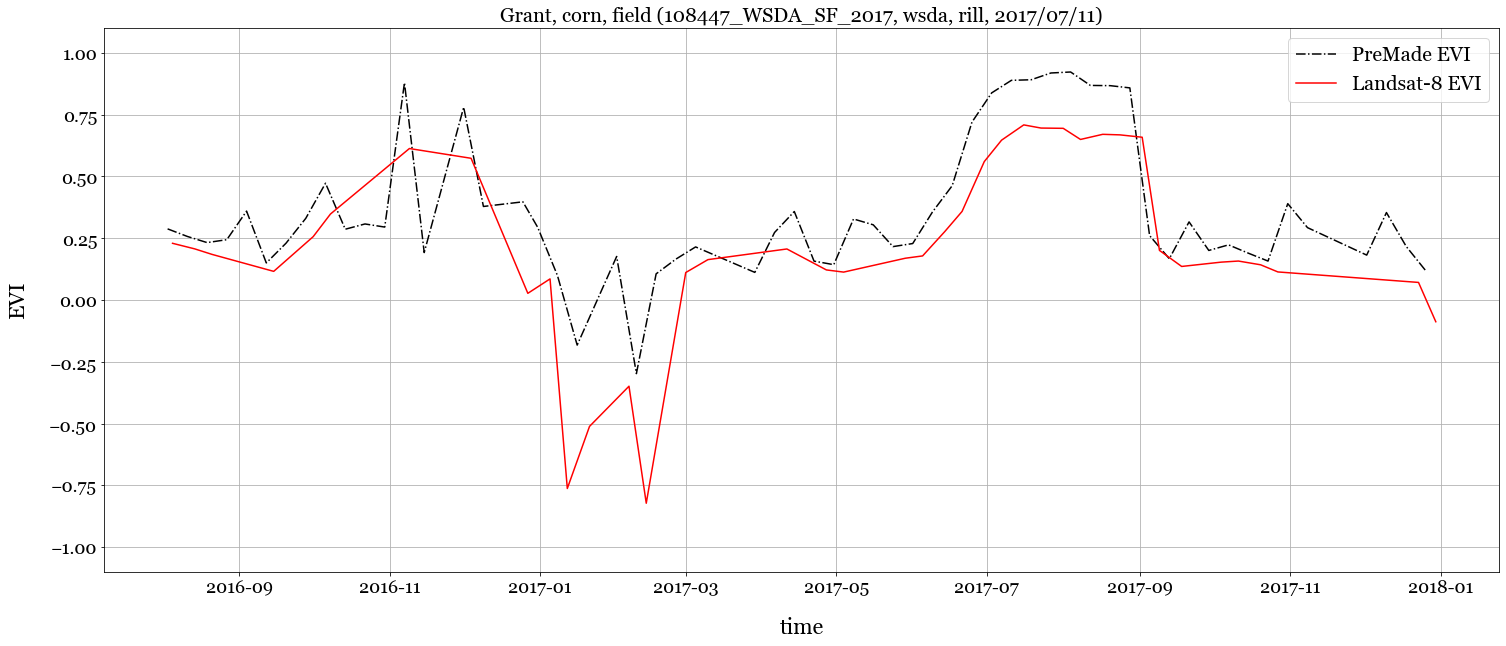

In [17]:
curr_ID = EVI_direct_IDs[0]
EVI_direct_field = EVI_direct[EVI_direct.ID == curr_ID].copy()
EVI_8day_field = EVI_8day[EVI_8day.ID ==  EVI_direct_IDs[0]].copy()

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)

#
# Plot the EVIs
#
x = EVI_8day_field.human_system_start_time.values
y = EVI_8day_field.EVI.values
ax.plot(x, y, '-k', ls='-.', label = 'PreMade EVI')

x = EVI_direct_field.human_system_start_time.values
y = EVI_direct_field.EVI.values
ax.plot(x, y, '-r', label = 'Landsat-8 EVI')

################################################
#
# Set labels and ticks
#
ax.set_xlabel('time', fontsize = label_FontSize, labelpad=20);
ax.set_ylabel('EVI', fontsize = label_FontSize, labelpad=20);
ax.tick_params(axis='y', which='major', labelsize = tick_FontSize)
ax.tick_params(axis='x', which='major', labelsize = tick_FontSize)
ax.legend(loc="best", fontsize=20);
ax.set_ylim([-1.1, 1.1])
# ax2.set_xlim([0, 2000])

a_title = EVI_direct_field.county.unique()[0] + ", " + \
          EVI_direct_field.CropTyp.unique()[0] + " (" + \
          EVI_direct_field.ID.unique()[0] +  ", " + \
          EVI_direct_field.DataSrc.unique()[0] +  ", " + \
          EVI_direct_field.Irrigtn.unique()[0] +  ", " + \
          EVI_direct_field.LstSrvD.unique()[0] +  ")"

ax.set_title(a_title, fontsize=20);
ax.grid(True)

file_name = data_dir + curr_ID + ".png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight', transparent=False)
plt.show()

In [20]:
EVI_direct_field.loc[20:30, ]

,ID,county,DataSrc,CropTyp,doy,EVI,Irrigtn,RtCrpTy,LstSrvD,Notes,system_start_time,human_system_start_time
20,108447_WSDA_SF_2017,Grant,wsda,"corn, field",36.0,-0.348947,rill,Alfalfa Hay,2017/07/11,NaN,1.486407e+09,2017-02-06
21,108447_WSDA_SF_2017,Grant,wsda,"corn, field",43.0,-0.822497,rill,Alfalfa Hay,2017/07/11,NaN,1.487012e+09,2017-02-13
23,108447_WSDA_SF_2017,Grant,wsda,"corn, field",59.0,0.111148,rill,Alfalfa Hay,2017/07/11,NaN,1.488394e+09,2017-03-01
24,108447_WSDA_SF_2017,Grant,wsda,"corn, field",68.0,0.163399,rill,Alfalfa Hay,2017/07/11,NaN,1.489171e+09,2017-03-10
26,108447_WSDA_SF_2017,Grant,wsda,"corn, field",100.0,0.206504,rill,Alfalfa Hay,2017/07/11,NaN,1.491936e+09,2017-04-11
28,108447_WSDA_SF_2017,Grant,wsda,"corn, field",116.0,0.121723,rill,Alfalfa Hay,2017/07/11,NaN,1.493319e+09,2017-04-27
29,108447_WSDA_SF_2017,Grant,wsda,"corn, field",123.0,0.112907,rill,Alfalfa Hay,2017/07/11,NaN,1.493924e+09,2017-05-04


# Plot Field 2

<Figure size 720x864 with 0 Axes>

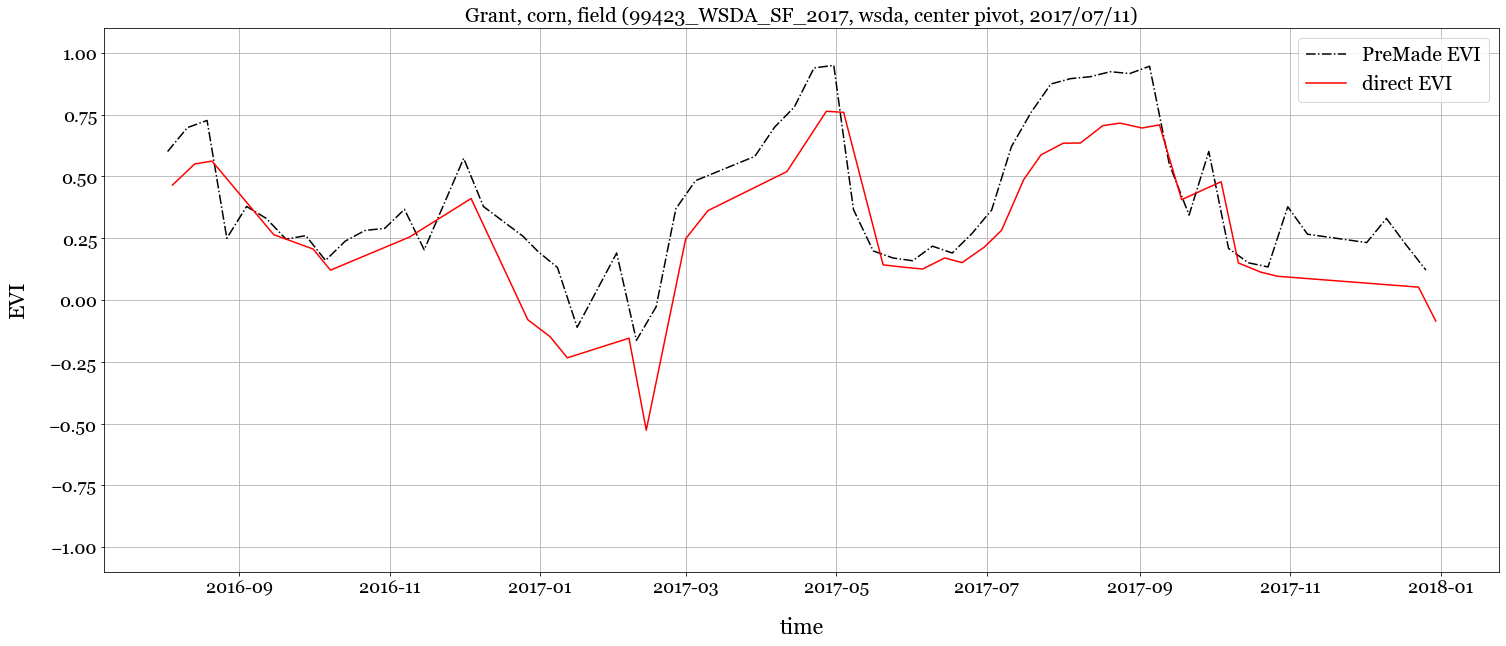

In [25]:
curr_ID = EVI_direct_IDs[1]
EVI_direct_field = EVI_direct[EVI_direct.ID == curr_ID].copy()
EVI_8day_field = EVI_8day[EVI_8day.ID == EVI_direct_IDs[1]].copy()

plt.figure()

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)

################################################
#
# Plot the data
#
x = EVI_8day_field.human_system_start_time.values
y = EVI_8day_field.EVI.values
ax.plot(x, y, '-k', ls='-.', label = 'PreMade EVI')

x = EVI_direct_field.human_system_start_time.values
y = EVI_direct_field.EVI.values
ax.plot(x, y, '-r', label = 'Landsat-8 EVI')

################################################
#
# Set labels and ticks
#
ax.set_xlabel('time', fontsize = label_FontSize, labelpad=20);
ax.set_ylabel('EVI', fontsize = label_FontSize, labelpad=20);
ax.tick_params(axis='y', which='major', labelsize = tick_FontSize)
ax.tick_params(axis='x', which='major', labelsize = tick_FontSize)
ax.legend(loc="best", fontsize=20);

ax.set_ylim([-1.1, 1.1])
# ax2.set_xlim([0, 2000])

a_title = EVI_direct_field.county.unique()[0] + ", " + \
          EVI_direct_field.CropTyp.unique()[0] + " (" + \
          EVI_direct_field.ID.unique()[0] +  ", " + \
          EVI_direct_field.DataSrc.unique()[0] +  ", " + \
          EVI_direct_field.Irrigtn.unique()[0] +  ", " + \
          EVI_direct_field.LstSrvD.unique()[0] +  ")"

ax.set_title(a_title, fontsize=20);
ax.grid(True)

file_name = data_dir + curr_ID + ".png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Plot Field 3

<Figure size 720x864 with 0 Axes>

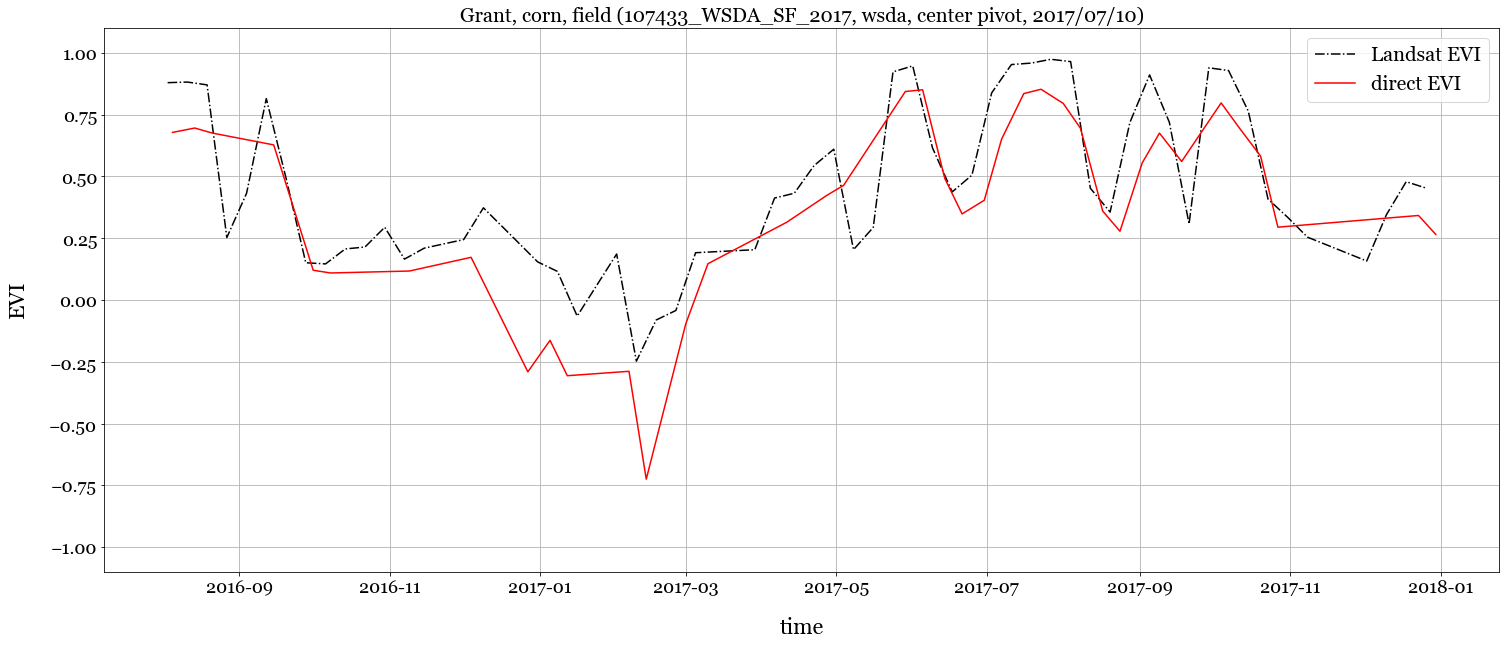

In [27]:
curr_ID = EVI_direct_IDs[2]

EVI_direct_field = EVI_direct[EVI_direct.ID == curr_ID].copy()
EVI_8day_field = EVI_8day[EVI_8day.ID == EVI_direct_IDs[2]].copy()

plt.figure()

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)

################################################
#
#   plot the data
#

x = EVI_8day_field.human_system_start_time.values
y = EVI_8day_field.EVI.values
ax.plot(x, y, '-k', ls='-.', label = 'Landsat EVI')

x = EVI_direct_field.human_system_start_time.values
y = EVI_direct_field.EVI.values
ax.plot(x, y, '-r', label = 'Landsat-8 EVI')

################################################
#
# Set labels and ticks
#
ax.set_xlabel('time', fontsize = label_FontSize, labelpad=20);
ax.set_ylabel('EVI', fontsize = label_FontSize, labelpad=20);
ax.tick_params(axis='y', which='major', labelsize = tick_FontSize)
ax.tick_params(axis='x', which='major', labelsize = tick_FontSize)
ax.legend(loc="best", fontsize=20);
ax.set_ylim([-1.1, 1.1])
# ax2.set_xlim([0, 2000])


a_title = EVI_direct_field.county.unique()[0] + ", " + \
          EVI_direct_field.CropTyp.unique()[0] + " (" + \
          EVI_direct_field.ID.unique()[0] +  ", " + \
          EVI_direct_field.DataSrc.unique()[0] +  ", " + \
          EVI_direct_field.Irrigtn.unique()[0] +  ", " + \
          EVI_direct_field.LstSrvD.unique()[0] +  ")"

ax.set_title(a_title, fontsize=20);
ax.grid(True)

file_name = data_dir + curr_ID + ".png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight', transparent=False)
plt.show()